## football-player k-means clustering as 3 sets 

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

In [68]:
data = pd.read_csv('C:\jupyter_devel\player_cluster\ST_player.csv')
data.columns

Index(['UID', 'Name', 'NationID', 'Born', 'Age', 'Height', 'Weight',
       'Finishing', 'FirstTouch', 'Heading', 'Technique', 'Anticipation',
       'OffTheBall', 'Agility', 'Strength', 'Position'],
      dtype='object')

In [69]:
data

,UID,Name,NationID,Born,Age,Height,Weight,Finishing,FirstTouch,Heading,Technique,Anticipation,OffTheBall,Agility,Strength,Position
0,1000337,STong Qi,110,7/4/1985,31,170,65,7,9,13,9,10,11,7,6,ST
1,1000340,Chen Lei,110,20-01-1983,33,181,70,12,5,12,3,4,9,4,5,ST
2,1002438,JameST-John DawST,765,29-05-1978,38,194,88,10,4,12,4,3,7,11,11,ST
3,1002454,STtéphane AmbaSTSTa,11,23-07-1982,33,188,84,10,12,8,7,9,10,7,11,ST
4,1002833,Chen Dong,110,10/7/1982,33,183,75,8,6,10,7,5,12,11,11,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,47064781,Marko PuSTkaric,761,7/4/1997,19,184,70,11,12,8,10,10,11,10,8,ST
9880,47069495,Arnaud Tattevin,769,20-02-2000,16,171,66,13,11,12,10,10,13,12,6,ST
9881,470778,Jean-Emmanuel Effa,11,26-12-1983,32,190,79,11,11,15,11,12,13,9,14,ST
9882,470824,Uğur Tülümen,799,20-09-1985,30,180,73,12,12,12,11,11,11,11,12,ST


In [70]:
data_ = data[['Finishing','FirstTouch','Heading','Technique','Anticipation','OffTheBall','Agility','Strength']]

In [71]:
data_

,Finishing,FirstTouch,Heading,Technique,Anticipation,OffTheBall,Agility,Strength
0,7,9,13,9,10,11,7,6
1,12,5,12,3,4,9,4,5
2,10,4,12,4,3,7,11,11
3,10,12,8,7,9,10,7,11
4,8,6,10,7,5,12,11,11
...,...,...,...,...,...,...,...,...
9879,11,12,8,10,10,11,10,8
9880,13,11,12,10,10,13,12,6
9881,11,11,15,11,12,13,9,14
9882,12,12,12,11,11,11,11,12


In [297]:
model = KMeans(n_clusters=3,algorithm = 'auto')
model.fit(data_)
predict = pd.DataFrame(model.predict(data_))
predict.columns=['predict']

r = pd.concat([data_,predict],axis =1)

print(r)

      Finishing  FirstTouch  Heading  Technique  Anticipation  OffTheBall  \
0             7           9       13          9            10          11   
1            12           5       12          3             4           9   
2            10           4       12          4             3           7   
3            10          12        8          7             9          10   
4             8           6       10          7             5          12   
...         ...         ...      ...        ...           ...         ...   
9879         11          12        8         10            10          11   
9880         13          11       12         10            10          13   
9881         11          11       15         11            12          13   
9882         12          12       12         11            11          11   
9883         13          12       12         13            12          12   

      Agility  Strength  predict  
0           7         6        2  
1    

In [300]:
# to save clustering result as csv file
result_cluster = pd.concat([data,predict],axis=1)
print(result_cluster)
result_cluster.to_csv('ST_clustered.csv')

           UID                 Name  NationID        Born  Age  Height  \
0      1000337             STong Qi       110    7/4/1985   31     170   
1      1000340             Chen Lei       110  20-01-1983   33     181   
2      1002438    JameST-John DawST       765  29-05-1978   38     194   
3      1002454  STtéphane AmbaSTSTa        11  23-07-1982   33     188   
4      1002833            Chen Dong       110   10/7/1982   33     183   
...        ...                  ...       ...         ...  ...     ...   
9879  47064781      Marko PuSTkaric       761    7/4/1997   19     184   
9880  47069495      Arnaud Tattevin       769  20-02-2000   16     171   
9881    470778   Jean-Emmanuel Effa        11  26-12-1983   32     190   
9882    470824         Uğur Tülümen       799  20-09-1985   30     180   
9883    470867          Ergin Keleş       799    1/1/1987   29     184   

      Weight  Finishing  FirstTouch  Heading  Technique  Anticipation  \
0         65          7           9   

### but this reulst has 8 dimensions. let's do PCA for visualization

In [110]:
LABEL = r[['predict']]

In [111]:
LABEL

,predict
0,0
1,1
2,1
3,1
4,1
...,...
9879,0
9880,0
9881,2
9882,2


In [129]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
%matplotlib inline
r_std = StandardScaler().fit_transform(data_)

In [94]:
r_std

array([[-2.07607428, -0.45535355,  0.83014417, ...,  0.09776089,
        -1.82862176, -0.87106556],
       [ 0.2259134 , -2.00185795,  0.46299073, ..., -0.65684173,
        -3.25966669, -1.18866966],
       [-0.69488167, -2.38848405,  0.46299073, ..., -1.41144434,
         0.07943815,  0.71695495],
       ...,
       [-0.23448414,  0.31789866,  1.56445103, ...,  0.85236351,
        -0.8745918 ,  1.66976725],
       [ 0.2259134 ,  0.70452476,  0.46299073, ...,  0.09776089,
         0.07943815,  1.03455905],
       [ 0.68631094,  0.70452476,  0.46299073, ...,  0.4750622 ,
         0.07943815,  1.03455905]])

In [95]:
import numpy as np 
features = r_std.T

In [96]:
covariane_matrix = np.cov(features)
print(covariane_matrix)

[[ 1.00010118  0.27740648  0.27945871  0.293842    0.24411695  0.27632616
   0.11127091  0.15602884]
 [ 0.27740648  1.00010118  0.30778276  0.55795185  0.35407208  0.32514019
   0.21875511  0.20712379]
 [ 0.27945871  0.30778276  1.00010118  0.33309651  0.30720965  0.28142126
   0.07408039  0.34135598]
 [ 0.293842    0.55795185  0.33309651  1.00010118  0.50681633  0.44090345
   0.24377824  0.4139009 ]
 [ 0.24411695  0.35407208  0.30720965  0.50681633  1.00010118  0.42148172
   0.16010001  0.4629239 ]
 [ 0.27632616  0.32514019  0.28142126  0.44090345  0.42148172  1.00010118
   0.19025865  0.31976135]
 [ 0.11127091  0.21875511  0.07408039  0.24377824  0.16010001  0.19025865
   1.00010118 -0.02055166]
 [ 0.15602884  0.20712379  0.34135598  0.4139009   0.4629239   0.31976135
  -0.02055166  1.00010118]]


In [97]:
eig_vals, eig_vecs = np.linalg.eig(covariane_matrix)

In [98]:
eig_vals

array([3.13985752, 1.08777041, 0.87783568, 0.37796643, 0.48500231,
       0.60522497, 0.72301192, 0.70414024])

In [164]:
eig_vecs

array([[-0.28453727,  0.107451  , -0.77513295,  0.0233397 , -0.07575999,
        -0.33960097,  0.38615345, -0.18956297],
       [-0.37925955,  0.26082369, -0.0736711 ,  0.51869553, -0.03536481,
         0.08879652, -0.6254122 , -0.33672659],
       [-0.33160193, -0.2259288 , -0.36333235, -0.09986328,  0.16896976,
         0.25627308, -0.29335467,  0.71883909],
       [-0.45151099,  0.08730251,  0.15265277, -0.78079051, -0.20211947,
        -0.08958778, -0.23379987, -0.2281201 ],
       [-0.41163447, -0.15124882,  0.29099372,  0.08037782,  0.77361697,
        -0.27740503,  0.1829002 , -0.08748527],
       [-0.37896435,  0.03166606,  0.10493845,  0.0801972 , -0.10502062,
         0.75325587,  0.48827261, -0.14527812],
       [-0.1777031 ,  0.75341985,  0.255468  ,  0.09590829, -0.12075615,
        -0.21421166,  0.18970039,  0.47944022],
       [-0.34167736, -0.51984547,  0.27834314,  0.29784748, -0.54727699,
        -0.3359314 ,  0.10572079,  0.15261174]])

In [202]:
(eig_vals[0]+eig_vals[1]+eig_vals[2]) / sum(eig_vals)
# 정보 유지의 정도가 0.63

0.6381183845531888

In [197]:
#no need
#proj_R1 = r_std.dot(eig_vals.T[0])
#proj_R2 = r_std.dot(eig_vals.T[1])
#proj_R3 = r_std.dot(eig_vals.T[2])

In [211]:
pc1 = eig_vecs[:,0]
proj_R1 =np.dot(r_std,pc1)

pc2 = eig_vecs[:,1]
proj_R2 = np.dot(r_std,pc2)

pc3 = eig_vecs[:,2]
proj_R3 = np.dot(r_std,pc3)

print("proj_R1 :{} \n proj_R2 :{}\nproj_R3 :{}".format( proj_R1, proj_R2, proj_R3))

proj_R1 :[ 0.93157552  3.46179823  2.89250422 ... -2.06222029 -1.49849712
 -2.23922939] 
 proj_R2 :[-1.50860592 -2.39217989 -1.00699442 ... -1.89525633 -0.41858284
 -0.34690698]
proj_R3 :[ 0.74567588 -2.25826104 -0.25781934 ...  0.33581786  0.23755824
  0.13069623]


#### I decomposed as 3 dimenstions and then, make df, cluster again 

In [213]:
pc1 = eig_vecs[:,0]
proj_R1 =np.dot(r_std,pc1)

pc2 = eig_vecs[:,1]
proj_R2 = np.dot(r_std,pc2)

pc3 = eig_vecs[:,2]
proj_R3 = np.dot(r_std,pc3)

print("proj_R1 :{} \n proj_R2 :{}\nproj_R3 :{}".format( proj_R1, proj_R2, proj_R3))

proj_R1 :[ 0.93157552  3.46179823  2.89250422 ... -2.06222029 -1.49849712
 -2.23922939] 
 proj_R2 :[-1.50860592 -2.39217989 -1.00699442 ... -1.89525633 -0.41858284
 -0.34690698]
proj_R3 :[ 0.74567588 -2.25826104 -0.25781934 ...  0.33581786  0.23755824
  0.13069623]


### draw plot with sklearn PCA module 

In [276]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)
sklearn_pca_r = pca.fit_transform(r_std)

In [273]:
sklearn_result = pd.DataFrame(proj_R1,columns=['PC1'])
sklearn_result['PC2'] = proj_R2
sklearn_result['PC3'] = proj_R3
sklearn_result['y-axis'] = 0.0 
sklearn_result['z-axis'] = 0.0 
sklearn_result['label'] = LABEL
sklearn_result

,PC1,PC2,PC3,y-axis,z-axis,label
0,0.931576,-1.508606,0.745676,0.0,0.0,0
1,3.461798,-2.392180,-2.258261,0.0,0.0,1
2,2.892504,-1.006994,-0.257819,0.0,0.0,1
3,0.774565,-1.490650,0.448619,0.0,0.0,1
4,1.618378,-0.689431,1.229756,0.0,0.0,1
...,...,...,...,...,...,...
9879,-0.056968,0.185853,0.496924,0.0,0.0,0
9880,-0.897798,0.925041,-0.575821,0.0,0.0,0
9881,-2.062220,-1.895256,0.335818,0.0,0.0,2
9882,-1.498497,-0.418583,0.237558,0.0,0.0,2


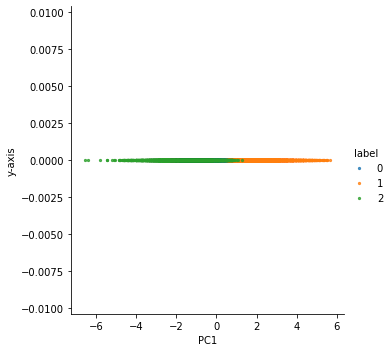

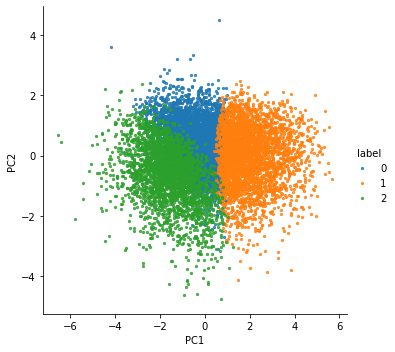

In [293]:
#sklearn_result = pd.DataFrame(proj_R1,columns=['PC1'])
#sklearn_result['y-axis'] = 0.0 
#sklearn_result['z-axis'] = 0.0 
#sklearn_result['label'] = LABEL
sns.lmplot('PC1','y-axis',data = sklearn_result,fit_reg=False,
           scatter_kws={"s" :5},
           hue='label')

sns.lmplot('PC1','PC2',data = sklearn_result,fit_reg=False,
           scatter_kws={"s" :5},
           hue='label')

#3d ->pairplot
#sns.lmplot('PC1','PC2','PC3',data = sklearn_result,fit_reg=False,
#           scatter_kws={"s" :5},
#           hue='label')

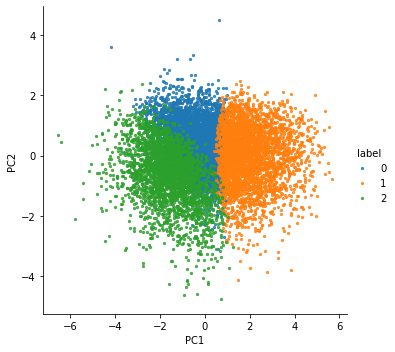

In [304]:
#to save cluser visualization image 
sns_plot = sns.lmplot('PC1','PC2',data = sklearn_result,fit_reg=False,
           scatter_kws={"s" :5},
           hue='label')    
sns_plot.savefig("cluster_2d.png")

In [288]:
sklearn_result_ = pd.DataFrame(proj_R1,columns=['PC1'])
sklearn_result_['PC2'] = proj_R2
sklearn_result_['PC3'] = proj_R3
sklearn_result_['label'] = LABEL
sklearn_result_

,PC1,PC2,PC3,label
0,0.931576,-1.508606,0.745676,0
1,3.461798,-2.392180,-2.258261,1
2,2.892504,-1.006994,-0.257819,1
3,0.774565,-1.490650,0.448619,1
4,1.618378,-0.689431,1.229756,1
...,...,...,...,...
9879,-0.056968,0.185853,0.496924,0
9880,-0.897798,0.925041,-0.575821,0
9881,-2.062220,-1.895256,0.335818,2
9882,-1.498497,-0.418583,0.237558,2


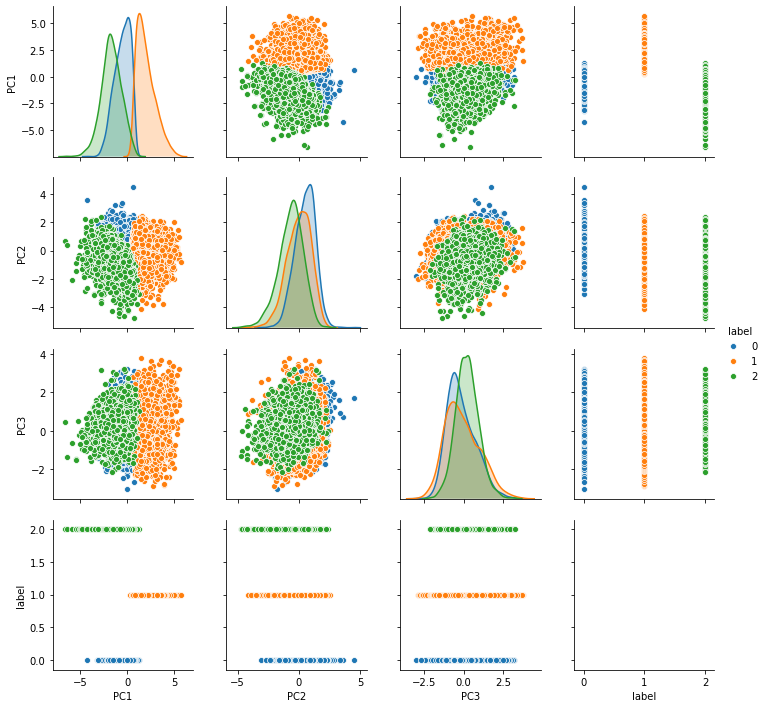

In [295]:
sns.pairplot(sklearn_result_,hue='label')

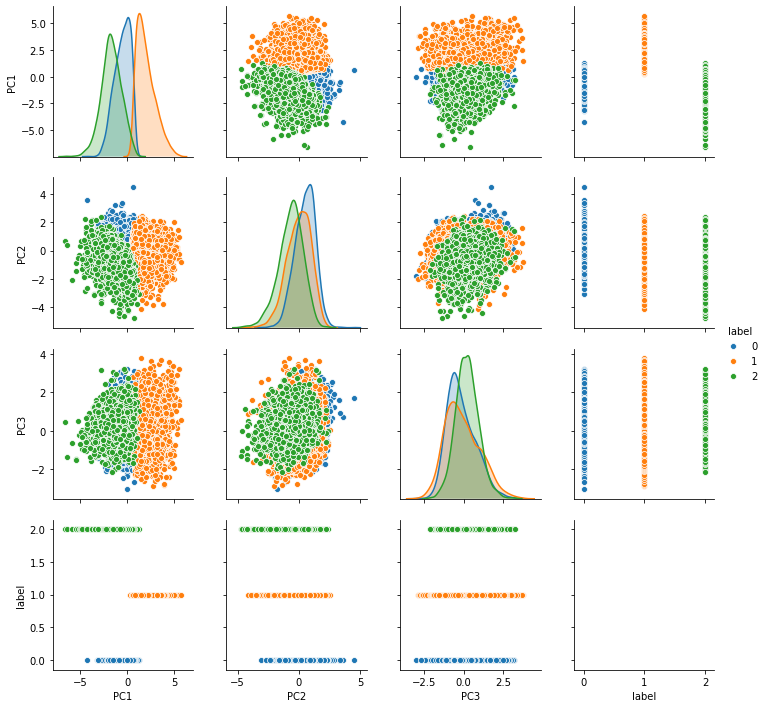

In [305]:
#to save cluster image
sns_plot = sns.pairplot(sklearn_result_,hue='label')    
sns_plot.savefig("cluster_3d.png")

In [290]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    